In [1]:
import time
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import requests
import os
import json
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Start finding changes of ARS-USD exchange rate!
driver = webdriver.Chrome()

driver.get('https://www.dolarhoy.com')
my_div = driver.find_element(By.CLASS_NAME, "venta")
first_tc = my_div.get_attribute("outerHTML").split('''val">''')[-1].split('</div')[0]
first_tc = first_tc.split('$')[-1]

all_tc_found = [first_tc]

## refreshes the web page
timeout = 20
while True:
    try:
        WebDriverWait(driver, timeout)
        driver.refresh()
        my_div2 = driver.find_element(By.CLASS_NAME, "venta")
        new_tc = my_div2.get_attribute("outerHTML").split('''val">''')[-1].split('</div')[0]
        new_tc = new_tc.split('$')[-1]
        if new_tc != first_tc:
            all_tc_found.append(new_tc)
            break
        time.sleep(timeout)
    except TimeoutException:
        print("timed out waiting for page to load")

Timed out waiting for page to load
Timed out waiting for page to load


In [ ]:
## Tweet it!
from requests_oauthlib import OAuth1Session

consumer_key = ##mykey##
consumer_secret = ##mykey##
access_token = ##mykey##
access_token_secret = ##mykey##

if float(all_tc_found[-1]) > float(all_tc_found[-2]):
    payload = {"text": f"El valor del Dólar Blue subió a {all_tc_found[-1]}"}
else:
    payload = {"text": f"El valor del Dólar Blue bajó a {all_tc_found[-1]}"}
    
## make the request
oauth = OAuth1Session(
    consumer_key,
    client_secret=consumer_secret,
    resource_owner_key=access_token,
    resource_owner_secret=access_token_secret,
) ## connection!

## making the request
response = oauth.post(
    "https://api.twitter.com/2/tweets",
    json=payload
)

## saving the response as json
json_response = response.json()
print(json.dumps(json_response, indent=4, sort_keys=True))

In [1]:
## final output

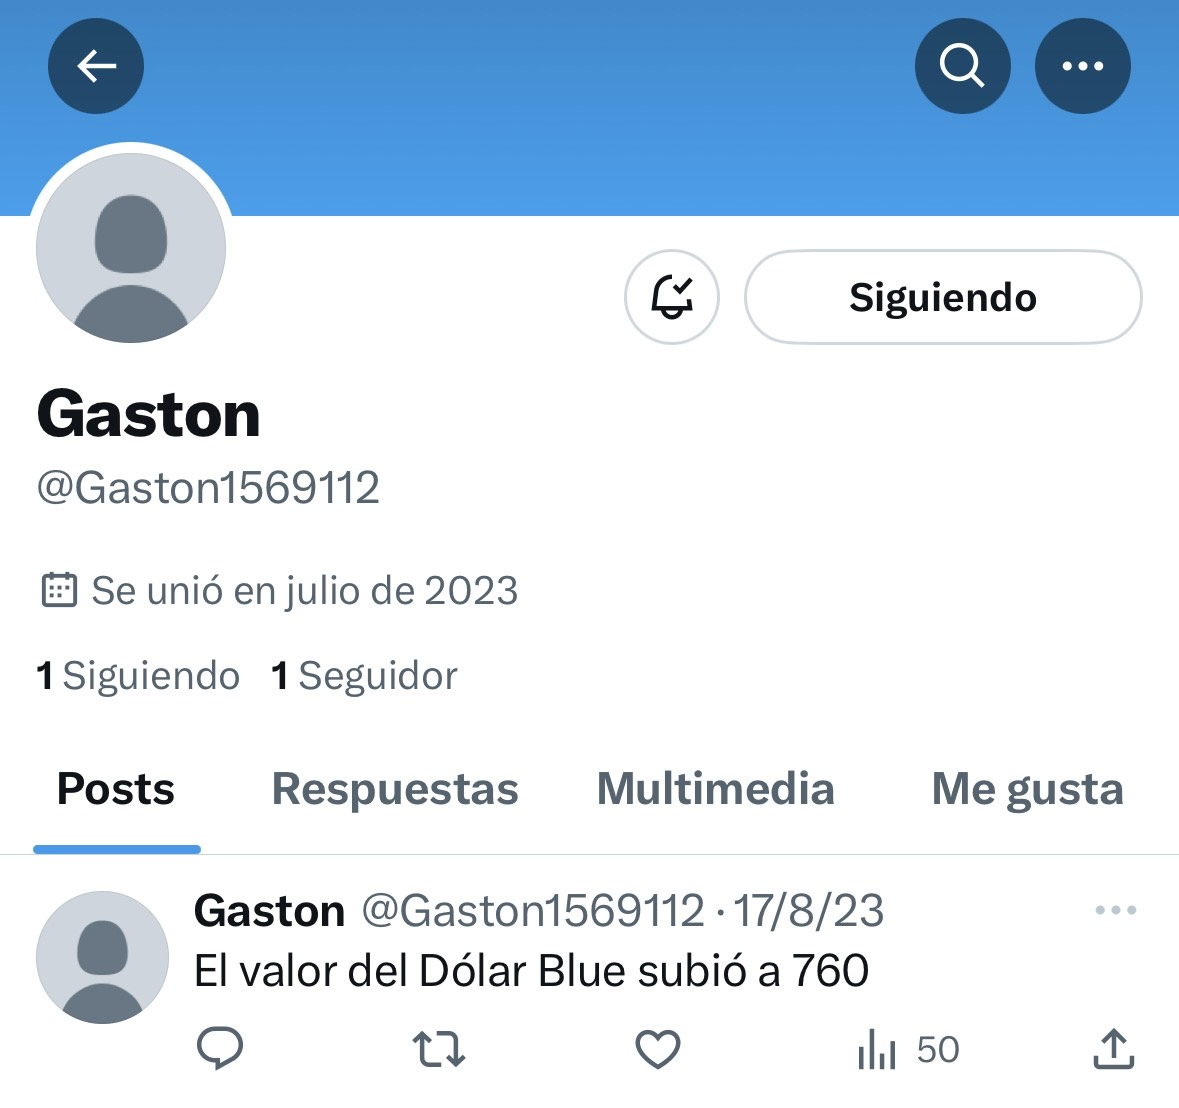